<a href="https://colab.research.google.com/github/anoy1729/mlresources/blob/master/classification_%26_mapping_in_tf_2_3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip3 install keras==2.2.2
#!pip3 install tensorflow==1.5.0 #1.5.0 working
!pip3 install git+git://github.com/raghakot/keras-vis.git --upgrade --no-deps
!pip install --upgrade tf-keras-vis tensorflow matplotlib
!pip3 install scipy==1.1.0
!pip3 install matplotlib==3.1.0 #cannot import name '_png' from 'matplotlib' er solve er jonno


  Cloning git://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-20ca4i5k
  Running command git clone -q git://github.com/raghakot/keras-vis.git /tmp/pip-req-build-20ca4i5k
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=38887 sha256=db5807f2df30582421dbca95d65c12cb0addd15b8ec6efff408df90760dc9a63
  Stored in directory: /tmp/pip-ephem-wheel-cache-aj_fyx4z/wheels/ff/01/8e/3a66d951f9b53f9894a010107b05253fb9a6c6f2555a5aaeca
Successfully built keras-vis
  Found existing installation: keras-vis 0.5.0
    Uninstalling keras-vis-0.5.0:
      Successfully uninstalled keras-vis-0.5.0
Requirement already up-to-date: tf-keras-vis in /usr/local/lib/python3.6/dist-packages (0.5.3)
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.3.1)
  Using cached https://files.pythonhosted.org/packages/cd/d6/8c4dfb23151d5a494c66ebbfdb5c8c433b44ec07fae52da5939fcda0943f/matplotlib-3.3.2-cp36-cp36m-manylinux1_x86_64.whl
ERROR: plotnine 0

  Using cached https://files.pythonhosted.org/packages/da/83/d989ee20c78117c737ab40e0318ea221f1aed4e3f5a40b4f93541b369b93/matplotlib-3.1.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.3.2
    Uninstalling matplotlib-3.3.2:
      Successfully uninstalled matplotlib-3.3.2


In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, MaxPool2D

import os
import time

from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import GlobalAveragePooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
PATH = os.getcwd()
# Define data path
data_path = "/content/drive/My Drive/Colab Notebooks/data"  #Data folder er moddhe 4ta subfolder ase cat,dog,horse,rider nam er
data_dir_list = os.listdir(data_path)   

In [5]:
img_data_list=[]                                       #empty list create korlam jkhane image gulo array te convert kore rakhbw

for dataset in data_dir_list:                              #ekhane dataset holo sub folder & data_dir_list main folder
	img_list=os.listdir(data_path+'/'+ dataset)            #img_list e new subfolder assign kora holo
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:                                   #sub folder theke protita image read korar jonnw nested loop
		img_path = data_path + '/'+ dataset + '/'+ img     #sub folder e ekta image pelo
		img = image.load_img(img_path, target_size=(224, 224))   #sei image ta reshape kore new ekta variable img te rakha holo
		x = image.img_to_array(img)                         #sei image k image theke array te convert korlam & X er moddhe rakhlam
		x = np.expand_dims(x, axis=0)                # x ekta array & axis,0 er mane row wise append/add kora..upor theke niche 
		x = preprocess_input(x)                      # preprocessing kora holo
		print('Input image shape:', x.shape)         
		img_data_list.append(x)   

Loaded the images of dataset-cats

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 2

In [6]:
img_data = np.array(img_data_list)   # training list k numpy te convert kora holo
print (img_data.shape)               # ( 200, 1, 224, 224, 3 )
img_data=np.rollaxis(img_data,1,0)   # (1, 200, 224, 224, 3) ekhane 1 ta k age newar jnnw rollaxis use kora holo
print (img_data.shape)
img_data=img_data[0]                 # training list er shape; total image = 808 ; dimension = 224 X 224 ; channel = 3 
print (img_data.shape)

(200, 1, 224, 224, 3)
(1, 200, 224, 224, 3)
(200, 224, 224, 3)


In [7]:
num_classes = 4                     # class er number
num_of_samples = img_data.shape[0]  # total sample er number 
labels = np.ones((num_of_samples,),dtype='int64')  #ekhaen label ekta 1D array jar elements number = sample number & sob gulor value 1 assign kora holo

                                    # image load howar time alphabetically ascending order load hoy
labels[0:50]=0                     # cat er jonno 0
labels[50:100]=1                   # dog er jonno 1
labels[100:150]=2                   # Humans er jonno 3 ekhane humans er H capital howay horse er age ashlo
labels[150:]=3                      # horses er jonno 4

print(labels)

names = ['cats','dogs','humans','horses',]   #Class gulor name er list

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [8]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes) # Label gulo Y te assign kora holo
print(Y)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2) #shuffle kora holo & x = training sample, y = label 
# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2) # ekhane training set er 20% data niei validation/test set kora holo

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0.

In [9]:
# create the base pre-trained model
model = VGG16(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = model.output
x = GlobalAveragePooling2D()(x)


# let's add a fully-connected layer
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(4, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in model.layers:
    layer.trainable = True

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer=Adam(lr=0.00001),   #tensorflow 1.5.0 te lr & 2.3 te learning_rate
              loss="categorical_crossentropy",
              metrics=['accuracy'])

# train the model on the new data for a few epochs
model.fit(x = X_train, 
          y = Y_train, 
          validation_data=(X_test, Y_test), 
          batch_size = 32,
          epochs = 10,
          verbose = 1)

Epoch 1/10
5/5 [==============================] - 5s 1s/step - loss: 1.0821 - accuracy: 0.5750 - val_loss: 0.7359 - val_accuracy: 0.7500
Epoch 2/10
5/5 [==============================] - 5s 901ms/step - loss: 0.2369 - accuracy: 0.9812 - val_loss: 0.2722 - val_accuracy: 0.9250
Epoch 3/10
5/5 [==============================] - 4s 900ms/step - loss: 0.0564 - accuracy: 1.0000 - val_loss: 0.1980 - val_accuracy: 0.9500
Epoch 4/10
5/5 [==============================] - 5s 901ms/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.2501 - val_accuracy: 0.9000
Epoch 5/10
5/5 [==============================] - 5s 903ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.3451 - val_accuracy: 0.8750
Epoch 6/10
5/5 [==============================] - 4s 900ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4294 - val_accuracy: 0.8750
Epoch 7/10
5/5 [==============================] - 5s 900ms/step - loss: 6.9264e-04 - accuracy: 1.0000 - val_loss: 0.4911 - val_accuracy: 0.8500
Epoch 8/10
5/5 [===

In [10]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n', 'Test accuracy:', score[1])

2/2 [==============================] - 0s 58ms/step - loss: 0.5479 - accuracy: 0.8500

 Test accuracy: 0.8500000238418579


#Attention with Saliency and Class Activation Map
This notebook explain how to get various attention images with Saliency, SmoothGrad, GradCAM, GradCAM++ and ScoreCAM/Faster-ScoreCAM. **bold text**

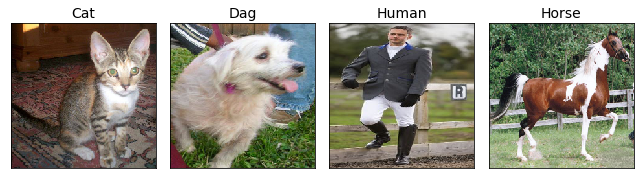

In [11]:
import matplotlib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from matplotlib import pyplot as plt

# Image titles
image_titles = ['Cat', 'Dag', 'Human', 'Horse']

# Load images
img1 = load_img('/content/drive/My Drive/Colab Notebooks/map_input/cat.jpg', target_size=(224, 224))
img2 = load_img('/content/drive/My Drive/Colab Notebooks/map_input/dog.jpg', target_size=(224, 224))
img3 = load_img('/content/drive/My Drive/Colab Notebooks/map_input/human.jpg', target_size=(224, 224))
img4 = load_img('/content/drive/My Drive/Colab Notebooks/map_input/horse.jpg', target_size=(224, 224))
images = np.asarray([np.array(img1), np.array(img2), np.array(img3), np.array(img4)])

# Preparing input data
X = preprocess_input(images)

# Rendering
subplot_args = { 'nrows': 1, 'ncols': 4, 'figsize': (9, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }
f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(images[i])
plt.tight_layout()
plt.show()

In [12]:
#Define Loss functions
#You MUST define loss function that return target scores. Here, it returns the scores corresponding Goldfish, Bear, Assault Rifle.

# The `output` variable refer to the output of the model,
# so, in this case, `output` shape is `(3, 1000)` i.e., (samples, classes).
def loss(output):
    # 1 is the imagenet index corresponding to Goldfish, 294 to Bear and 413 to Assault Rifle.
    #cat = 0 ,dog = 1, human = 2 , horse = 3
    return (output[0][0], output[1][1], output[2][2],output[3][3])

In [13]:

#Define Model-Modifier function
#Then, when the softmax activation function is applied to the last layer of model, it may obstruct generating the attention images, so you need to replace the function to a linear function. Here, we does so using model_modifier.

def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

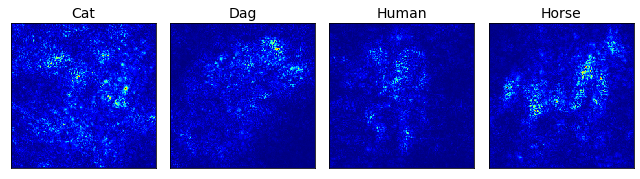

CPU times: user 1.96 s, sys: 1.18 s, total: 3.14 s
Wall time: 3.04 s


In [14]:
#Vanilla Saliency
#Saliency generate the saliency map that appears input regions that a change in the input value contribute the output value.

%%time
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

# Create Saliency object.
# If `clone` is True(default), the `model` will be cloned,
# so the `model` instance will be NOT modified, but it takes a machine resources.
saliency = Saliency(model,
                    model_modifier=model_modifier,
                    clone=False)

# Generate saliency map
saliency_map = saliency(loss, X)
saliency_map = normalize(saliency_map)

# Render
f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()

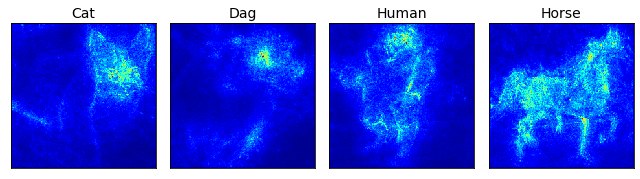

In [15]:
#As you can see avobe, Vanilla Saliency map is too noisy, so let's remove noise in the saliency map using SmoothGrad! SmoothGrad is a method that reduce noise including saliency map by adding noise to input image.

#Note: Because SmoothGrad calculates gradients repeatedly, it takes much time around 2-3 minutes when using CPU.


# Create Saliency object.
saliency = Saliency(model,
                    model_modifier=model_modifier,
                    clone=False)

# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map = saliency(loss,
                        X,
                        smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.20) # noise spread level.
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
#plt.savefig('images/smoothgrad.png')
plt.show()


# **GradCAM**
Saliency is one of useful way of visualizing attention that appears input regions that a change in the input value contribute the output value. GradCAM is another way of visualizing attention over input. Instead of using gradients with respect to model outputs, it uses penultimate (pre Dense layer) Conv layer output.

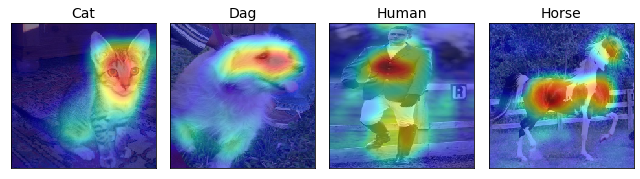

CPU times: user 677 ms, sys: 148 ms, total: 825 ms
Wall time: 782 ms


In [16]:
%%time

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Create Gradcam object
gradcam = Gradcam(model,
                  model_modifier=model_modifier,
                  clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss,
              X,
              penultimate_layer=-1, # model.layers number
             )
cam = normalize(cam)

f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
plt.tight_layout()
plt.show()

# **GradCAM++**
GradCAM++ can provide better visual explanations of CNN model predictions. In tf-keras-vis, GradcamPlusPlus (GradCAM++) class has most of compatibility with Gradcam. So you can use GradcamPlusPlus if you just replace classname from Gradcam to GradcamPlusPlus.

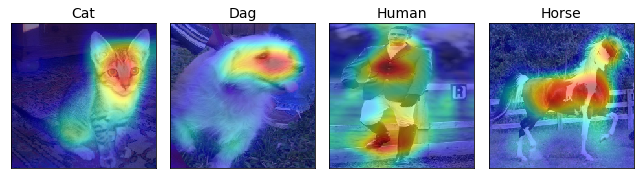

CPU times: user 637 ms, sys: 101 ms, total: 737 ms
Wall time: 803 ms


In [17]:

%%time

from tf_keras_vis.gradcam import GradcamPlusPlus

# Create GradCAM++ object, Just only repalce class name to "GradcamPlusPlus"
# gradcam = Gradcam(model, model_modifier, clone=False)
gradcam = GradcamPlusPlus(model,
                          model_modifier,
                          clone=False)

# Generate heatmap with GradCAM++
cam = gradcam(loss,
              X,
              penultimate_layer=-1, # model.layers number
             )
cam = normalize(cam)

f, ax = plt.subplots(**subplot_args)
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
plt.tight_layout()
#plt.savefig('images/gradcam_plus_plus.png')
plt.show()


# **ScoreCAM**
Lastly, Here, we show you ScoreCAM. SocreCAM is an another method that generate Class Activation Map. The characteristic is that it's the gradient-free CAM method unlike GradCAM/GradCAM++.

In default, this method takes too much time, so in the cell below ScoreCAM is NOT run with CPU.

1 GPUs


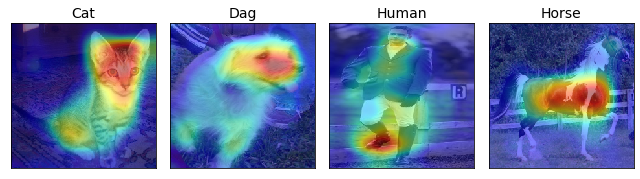

CPU times: user 5min 24s, sys: 9.41 s, total: 5min 33s
Wall time: 5min 33s


In [18]:
%%time

from tf_keras_vis.scorecam import ScoreCAM
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('{} GPUs'.format(gpus))


# Create ScoreCAM object
scorecam = ScoreCAM(model, model_modifier, clone=False)

# This cell takes toooooooo much time, so only doing with GPU.
if gpus > 0:
    # Generate heatmap with ScoreCAM
    cam = scorecam(loss,
                   X,
                   penultimate_layer=-1, # model.layers number
                  )
    cam = normalize(cam)

    f, ax = plt.subplots(**subplot_args)
    for i, title in enumerate(image_titles):
        heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
        ax[i].set_title(title, fontsize=14)
        ax[i].imshow(images[i])
        ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    plt.tight_layout()
    plt.show()